In [19]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def load_clothes():
    train = np.loadtxt("./clothes/fashion-mnist_train.csv", skiprows=1, dtype=int, delimiter=',')
    test = np.loadtxt("./clothes/fashion-mnist_test.csv", skiprows=1, dtype=int, delimiter=',')
    
    # testing of code in notebook
    train = train[:100, :]
    test = test[:100, :]
    
    ytr = train[:,0]
    xtr = train[:,1:]
    
    yte = test[:,0]
    xte = test[:,1:]
    
    
    return xtr, ytr, xte, yte

c_xtr, c_ytr, c_xte, c_yte = load_clothes()

In [21]:
def split_xy(data):
    return data[:,1:], data[:,0]

def resize_clothes(x):
    new_set = np.zeros(4096)
    
    for sample in x:
        sample = sample.astype(float)
        resized = cv2.resize(sample.reshape(28, 28), (64, 64))
        new_set = np.vstack((new_set, resized.ravel()))
        
    return new_set[1:]

def save(x, y, name):
    file = open(name, "wb")
    np.savez(file, inputs=x, targets=y)

def filter(data, valid_labels):
    valid_data = np.zeros(data.shape[1])
    for sample in data:
        if sample[0] in valid_labels:
            valid_data = np.vstack((valid_data, sample))


    return valid_data[1:,:]

def relabel(y):
    current_labels = np.unique(y)
    new_y = np.ones_like(y)*(-1)

    for idx, label in enumerate(current_labels):
        new_y[y == label] = idx

    return new_y.astype(int)

def save_images(fname, x, y):

    records = np.array(["-1", "fakepath"]).astype(str)

    c = 0
    for label, image in zip(y, x):
        image_path = "./clothes/{:s}/{:d}/{:d}.jpg".format(fname,label,c)
        cv2.imwrite(image_path, image.reshape((64, 64)))
        records = np.vstack((records, [label, image_path]))
        c = c + 1

    records = records[1:,:]
    np.savetxt("clothes_{:s}.txt".format(fname), records, delimiter=',', fmt='%s')

In [18]:
def prepare(xtr, ytr, xte, yte):
    c_xtr = resize_clothes(xtr)
    c_xte = resize_clothes(xte)

    # Get only seven classes discard 7, 6, 4
    c_ytr = ytr.reshape((-1, 1))
    c_yte = yte.reshape((-1, 1))

    train = np.hstack((c_ytr, c_xtr))
    test = np.hstack((c_yte, c_xte))

    valid_labels = [0,1,2,3,5,8,9]

    train = filter(train, valid_labels)
    test = filter(test, valid_labels)

    xtr_, ytr_ = split_xy(train)
    xte_, yte_ = split_xy(test)

    # to have a continuos set of labels: 0, 1, 2, 3,...
    ytr_ = relabel(ytr_)
    yte_ = relabel(yte_)
    assert -1 not in np.unique(ytr_) 
    assert -1 not in np.unique(yte_) 

    save_images("train", xtr_, ytr_)
    save_images("test", xte_, yte_)

prepare(c_xtr, c_ytr, c_xte, c_yte)

ValueError: cannot reshape array of size 784 into shape (64,64)

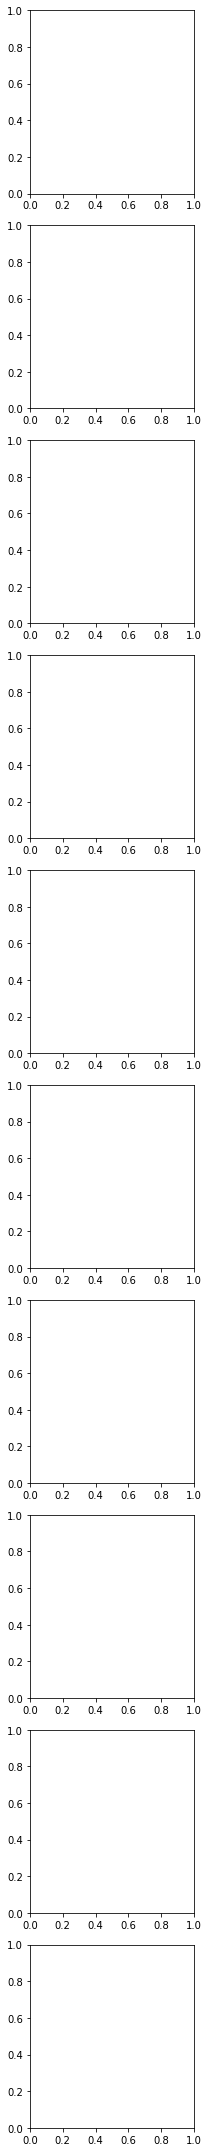

In [4]:
def plot_clothes(x, y):
    
    labels = np.unique(y)
    l = len(labels)
    c = 3
    
    f, ax = plt.subplots(l, 1, figsize=(c, c*l))
    f.tight_layout()
    
    for idx, label in enumerate(labels):
        positions = y == label
        x_labels = x[positions]
        nsamples = len(x_labels)
        
        sample = x_labels[0].reshape((64,64))
        
        ax[idx].imshow(sample, cmap="gray")
        ax[idx].axis("off")
        ax[idx].set_title("Class: {:d}, Number of samples: {:d}".format(label, nsamples))
        
        
plot_clothes(c_xtr, c_ytr)

In [41]:
def save(x, y, name):
    file = open(name, "wb")
    np.savez(file, inputs=x, targets=y)
    
save(c_xtr, c_ytr, "train_clothes.npz")